# Marketing Email Analysis 
For the analysis, we would assume that all the sent emails are completely delivered (there are no bounce emails)
The crucial goal of this take home assignment is to determine the best time to send emails
Here are the steps on how I approach the assignment: 

1. Data Preprocessing 

    1.1 Data Cleansing 

    1.2 Create additional columns that are useful for the analysis 

    1.3 Final check to see if the data meets the requirement 

        a) The emails can only be opened after sending them

        b) No NaN, no Null 
        
2. Data Anlysis and Results: 

    I brainstormed questions that could potentially be answered by this data set:
    - What is overall the Open Rate, Click-through Rate, Click-to-open Rate and Unsubscribe Rate of this email campaign?
    - Agaisnt time, is there any pattern in the email senders?
    - Is there any pattern between the number of opened emails agaisnt time?
    - On average, how long does it take for email recipients to read the emails?
    - When is the most likely for a recipient to open emails 
    After creating corresponding data frame and plots, I make comments in each question or hypothesis.
        - Plot between variables against time 
        - Plot between variables against weekday
        - Plot between variables against hour frame
    
3. Reference

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./Take_Home_Test_Database.csv")
df.head(10)

,send_time,open_time,sends,opens,clicks,unsubs
0,2014-03-17 15:36:44.874541+0000,2014-03-17 15:39:26.820882+0000,1,1,1,0
1,2014-03-17 16:58:14.676486+0000,NaN,1,0,0,0
2,2014-03-17 16:58:15.389193+0000,NaN,1,0,0,0
3,2014-03-17 16:58:35.056325+0000,NaN,1,0,0,0
4,2014-03-17 16:58:35.396159+0000,2014-03-17 17:13:19.616974+0000,1,1,0,0
5,2014-03-17 16:58:37.591367+0000,NaN,1,0,0,0
6,2014-03-17 16:58:37.940655+0000,2014-03-18 03:27:59.365039+0000,1,1,0,0
7,2014-03-17 16:58:38.900273+0000,2014-03-17 20:18:54.066567+0000,1,1,1,0
8,2014-03-17 16:58:39.261359+0000,NaN,1,0,0,0
9,2014-03-17 16:58:39.512986+0000,2014-03-18 23:33:59.827134+0000,1,1,0,0


## 1. Data Preprocessing 
### 1.1 Data Cleansing 
- Check if there is any NaN or NA or null in the table 
- Check if there is any duplicate

In [3]:
df.info()
print('there is {:.2f} duplicates'.format(df.duplicated().sum()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296174 entries, 0 to 296173
Data columns (total 6 columns):
send_time    296174 non-null object
open_time    74923 non-null object
sends        296174 non-null int64
opens        296174 non-null int64
clicks       296174 non-null int64
unsubs       296174 non-null int64
dtypes: int64(4), object(2)
memory usage: 13.6+ MB
there is 0.00 duplicates


   - From the dataframe information, there are 296174 rows; the majority of the columns don't have null objects (except for the open_time column). Instead of leaving the open_time columns blank. I would replace it with "0-0-0" string
   
   - All columns have the correct corresponding data types. ['send_time'],['open_time'] are object ['sends'],['opens'], ['clicks'], ['unsubs'] are in integer. 
   -  There are no rows that are duplicated

In [4]:
df_original=df
df_original = df_original.fillna("0")
#df_original.info()
df_original.head(5)


,send_time,open_time,sends,opens,clicks,unsubs
0,2014-03-17 15:36:44.874541+0000,2014-03-17 15:39:26.820882+0000,1,1,1,0
1,2014-03-17 16:58:14.676486+0000,0,1,0,0,0
2,2014-03-17 16:58:15.389193+0000,0,1,0,0,0
3,2014-03-17 16:58:35.056325+0000,0,1,0,0,0
4,2014-03-17 16:58:35.396159+0000,2014-03-17 17:13:19.616974+0000,1,1,0,0


### 1.2 Create extra columns for the dataframe df_original 
  For the ['send_time'] and ['opent_time'] columns
    extract month, date, day and converting the time into a continous format 
    * send_year : year from the 'send_time' column
    * send_month : month from the 'send_time' column
    * send_day : day from the 'send_time' column
    * send_hour : convert the time in the 'send_time' columns into a continuous time
    
    * open_year : year from the 'open_time' column
    * open_month : month from the 'open_time' column
    * open_day : day from the 'open_time' column
    * open_hour : convert the time in the 'open_time' columns into a continuous time

To calculate for the 'send_hour' and 'open_hour' column: 
    I use the following formula: $$ columns = hours + \frac{minutes}{60} + \frac{seconds}{3600}$$


In [5]:
#Adding year, month, day and hour columns for the send_time columns 

df_original['send_time'] = pd.to_datetime(df_original['send_time'])

df_original['send_year']=pd.DatetimeIndex(df_original['send_time']).year
df_original['send_year']= df_original['send_year'].astype(float)

df_original['send_month']=pd.DatetimeIndex(df_original['send_time']).month
df_original['send_month']= df_original['send_month'].astype(float)

df_original['send_day']=pd.DatetimeIndex(df_original['send_time']).day
df_original['send_day']= df_original['send_day'].astype(float)

df_original['send_hour']= df_original['send_time'].dt.hour + df_original['send_time'].dt.minute/60 + df_original['send_time'].dt.second/3600

#Add weekday columns
df_original['send_weekday']= df_original['send_time'].dt.dayofweek
df_original['send_weekday']= df_original['send_weekday'].astype(float)



df_original.head(5)

,send_time,open_time,sends,opens,clicks,unsubs,send_year,send_month,send_day,send_hour,send_weekday
0,2014-03-17 15:36:44.874541+00:00,2014-03-17 15:39:26.820882+0000,1,1,1,0,2014.0,3.0,17.0,15.612222,0.0
1,2014-03-17 16:58:14.676486+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.970556,0.0
2,2014-03-17 16:58:15.389193+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.970833,0.0
3,2014-03-17 16:58:35.056325+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.976389,0.0
4,2014-03-17 16:58:35.396159+00:00,2014-03-17 17:13:19.616974+0000,1,1,0,0,2014.0,3.0,17.0,16.976389,0.0


- With the column 'open_time'; there is a date that doesn't share the same time formate as other, ' 3/21/14 13:15' (%m/%d/%y %H%M). I create a subset of df_original, without that data point, then I would reconsider it later after merging the subset and df_original together

In [6]:
#create a dummie dataframe (dum1) to add open_hour, open_month, open_day and open_hours columns
subset_df=df_original[(df_original['open_time']!= '0') & (df_original['open_time']!='3/21/14 13:15')]
subset_df= pd.DataFrame({'open_time': subset_df['open_time']})

subset_df['open_time1']=pd.to_datetime(subset_df['open_time'])  #convert 'open_time' to datetime format

subset_df['open_year']= pd.DatetimeIndex(subset_df['open_time1']).year
subset_df['open_month']= pd.DatetimeIndex(subset_df['open_time1']).month
subset_df['open_day']= pd.DatetimeIndex(subset_df['open_time1']).day
subset_df['open_hour']= subset_df['open_time1'].dt.hour + subset_df['open_time1'].dt.minute/60 + subset_df['open_time1'].dt.second/3600
subset_df['open_weekday']= subset_df['open_time1'].dt.dayofweek

subset_df=subset_df.drop(columns=['open_time1'])   #convert 'open_time' back to string
subset_df.head(10)
#subset_df.info()
merged=pd.merge(df_original,subset_df, on='open_time', how='left')
#merged.info()
merged.head(5)



,send_time,open_time,sends,opens,clicks,unsubs,send_year,send_month,send_day,send_hour,send_weekday,open_year,open_month,open_day,open_hour,open_weekday
0,2014-03-17 15:36:44.874541+00:00,2014-03-17 15:39:26.820882+0000,1,1,1,0,2014.0,3.0,17.0,15.612222,0.0,2014.0,3.0,17.0,15.657222,0.0
1,2014-03-17 16:58:14.676486+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.970556,0.0,NaN,NaN,NaN,NaN,NaN
2,2014-03-17 16:58:15.389193+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.970833,0.0,NaN,NaN,NaN,NaN,NaN
3,2014-03-17 16:58:35.056325+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.976389,0.0,NaN,NaN,NaN,NaN,NaN
4,2014-03-17 16:58:35.396159+00:00,2014-03-17 17:13:19.616974+0000,1,1,0,0,2014.0,3.0,17.0,16.976389,0.0,2014.0,3.0,17.0,17.221944,0.0


In [8]:
df_original=merged
#finding the index of the time element '3/21/14 13:15' 
find_loc= df_original.index[df_original['open_time'] == '3/21/14 13:15'].tolist()


#Fill NaN value at open_year, open_month, open_day, open_hour columns
df_original.loc[find_loc[0],'open_year']=2014
df_original.loc[find_loc[0],'open_month']= 3
df_original.loc[find_loc[0],'open_day']=21
df_original.loc[find_loc[0],'open_hour']= 13+15/60
df_original.loc[find_loc[0],'open_weekday']=4.0
#df_original.head(20)
#f_original.info()

 ### 1.3 Final Check for the dataframe 
 - How many opened emails within the two-time sent emails (sending the same time)
 - Sometimes, your database might have some errors in its information. In this case, we have to make sure that the send_time happens before the open_time because the action of openning your email occurs after the email is delivered. 
   * The conditions would be 'open_hour' > 'send_hour' if they are in the same day or 'open_day' > 'send_day'
   

In [9]:
df_original[df_original['sends']!=1]

,send_time,open_time,sends,opens,clicks,unsubs,send_year,send_month,send_day,send_hour,send_weekday,open_year,open_month,open_day,open_hour,open_weekday
16109,2014-03-17 18:05:53.145257+00:00,0,2,0,0,0,2014.0,3.0,17.0,18.098056,0.0,NaN,NaN,NaN,NaN,NaN
34432,2014-03-18 17:47:18.484798+00:00,0,2,0,0,0,2014.0,3.0,18.0,17.788333,1.0,NaN,NaN,NaN,NaN,NaN
49115,2014-03-18 19:40:42.818769+00:00,0,2,0,0,0,2014.0,3.0,18.0,19.678333,1.0,NaN,NaN,NaN,NaN,NaN
55885,2014-03-18 19:44:54.740252+00:00,0,2,0,0,0,2014.0,3.0,18.0,19.748333,1.0,NaN,NaN,NaN,NaN,NaN
57883,2014-03-18 19:46:08.497952+00:00,0,2,0,0,0,2014.0,3.0,18.0,19.768889,1.0,NaN,NaN,NaN,NaN,NaN
81403,2014-03-19 18:08:46.084247+00:00,0,2,0,0,0,2014.0,3.0,19.0,18.146111,2.0,NaN,NaN,NaN,NaN,NaN
86385,2014-03-19 18:11:41.665451+00:00,0,2,0,0,0,2014.0,3.0,19.0,18.194722,2.0,NaN,NaN,NaN,NaN,NaN
100917,2014-03-19 18:20:51.171978+00:00,0,2,0,0,0,2014.0,3.0,19.0,18.347500,2.0,NaN,NaN,NaN,NaN,NaN
107822,2014-03-20 16:03:19.095975+00:00,0,2,0,0,0,2014.0,3.0,20.0,16.055278,3.0,NaN,NaN,NaN,NaN,NaN
135675,2014-03-20 17:42:01.452936+00:00,0,2,0,0,0,2014.0,3.0,20.0,17.700278,3.0,NaN,NaN,NaN,NaN,NaN


    - All the emails sent twice are not opened

In [15]:
df_original[(df_original['open_hour']<= df_original['send_hour'])& (df_original['open_day'] == df_original['send_day'])]

,send_time,open_time,sends,opens,clicks,unsubs,send_year,send_month,send_day,send_hour,send_weekday,open_year,open_month,open_day,open_hour,open_weekday
155941,2014-03-21 16:40:43.425507+00:00,3/21/14 13:15,1,1,0,0,2014.0,3.0,21.0,16.678611,4.0,2014.0,3.0,21.0,13.25,4.0


There is one data point that doesn't meet the condition,which is on the same day, open time happens after send time. We will drop that data and reset the index


In [16]:
df_original[df_original['open_day'] < df_original['send_day']]

,send_time,open_time,sends,opens,clicks,unsubs,send_year,send_month,send_day,send_hour,send_weekday,open_year,open_month,open_day,open_hour,open_weekday


There is no data point that have an open day before the send day

In [10]:
#Drop the data at index 155941
df_original=df_original[df_original['open_time']!='3/21/14 13:15']
df_original.reset_index(drop=True, inplace=True)
#df_original.loc[155941] #check if that data point was drop and reset index successfully
#df.loc[155942]

In [11]:
#Create a max and min dataframe
max_min_df=pd.DataFrame({'maximum':df_original.max(),'minimum':df_original.min()})  #.max and .min would skip the NaN 

In [13]:
df_original = df_original.fillna(0)
df_original.info()
df_original.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296173 entries, 0 to 296172
Data columns (total 16 columns):
send_time       296173 non-null datetime64[ns, UTC]
open_time       296173 non-null object
sends           296173 non-null int64
opens           296173 non-null int64
clicks          296173 non-null int64
unsubs          296173 non-null int64
send_year       296173 non-null float64
send_month      296173 non-null float64
send_day        296173 non-null float64
send_hour       296173 non-null float64
send_weekday    296173 non-null float64
open_year       296173 non-null float64
open_month      296173 non-null float64
open_day        296173 non-null float64
open_hour       296173 non-null float64
open_weekday    296173 non-null float64
dtypes: datetime64[ns, UTC](1), float64(10), int64(4), object(1)
memory usage: 36.2+ MB


,send_time,open_time,sends,opens,clicks,unsubs,send_year,send_month,send_day,send_hour,send_weekday,open_year,open_month,open_day,open_hour,open_weekday
0,2014-03-17 15:36:44.874541+00:00,2014-03-17 15:39:26.820882+0000,1,1,1,0,2014.0,3.0,17.0,15.612222,0.0,2014.0,3.0,17.0,15.657222,0.0
1,2014-03-17 16:58:14.676486+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.970556,0.0,0.0,0.0,0.0,0.000000,0.0
2,2014-03-17 16:58:15.389193+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.970833,0.0,0.0,0.0,0.0,0.000000,0.0
3,2014-03-17 16:58:35.056325+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.976389,0.0,0.0,0.0,0.0,0.000000,0.0
4,2014-03-17 16:58:35.396159+00:00,2014-03-17 17:13:19.616974+0000,1,1,0,0,2014.0,3.0,17.0,16.976389,0.0,2014.0,3.0,17.0,17.221944,0.0
5,2014-03-17 16:58:37.591367+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.976944,0.0,0.0,0.0,0.0,0.000000,0.0
6,2014-03-17 16:58:37.940655+00:00,2014-03-18 03:27:59.365039+0000,1,1,0,0,2014.0,3.0,17.0,16.976944,0.0,2014.0,3.0,18.0,3.466389,1.0
7,2014-03-17 16:58:38.900273+00:00,2014-03-17 20:18:54.066567+0000,1,1,1,0,2014.0,3.0,17.0,16.977222,0.0,2014.0,3.0,17.0,20.315000,0.0
8,2014-03-17 16:58:39.261359+00:00,0,1,0,0,0,2014.0,3.0,17.0,16.977500,0.0,0.0,0.0,0.0,0.000000,0.0
9,2014-03-17 16:58:39.512986+00:00,2014-03-18 23:33:59.827134+0000,1,1,0,0,2014.0,3.0,17.0,16.977500,0.0,2014.0,3.0,18.0,23.566389,1.0


- There are no null, NaN, NA cells! The dataframe is finished for analysis!

## 2. Data Analysing + Results

- Sometimes emails can be sent but can't be delivered. In this assignment, I will assume that all the sent emails are delivered. 


### 1. What is the date range of sends? of opens?

In [14]:
#the minimum would skip the NaN value
max_min_df.head(15)

,maximum,minimum
send_time,2014-03-23 20:31:12.031722+00:00,2014-03-17 15:36:44.874541+00:00
open_time,2014-03-25 22:25:58.724246+0000,0
sends,2,1
opens,1,0
clicks,1,0
unsubs,1,0
send_year,2014,2014
send_month,3,3
send_day,23,17
send_hour,23.4086,0.205278


From the information above:
- The emails are sent from March 17th to March 23rd  (The span of the send_email is a full week; from Monday to Sunday)
- The emails are opened on March 17th to March 25th 

### 2. How many sends, opens, clicks, unsubs are there in that time range?
 
What we care the most is the status of all the emails that have been sent from March 17 to March 23. There might be some emails opened later than the sending range that are not in the database, so instead we now focus on the data that we have. 

I used sum for the total numbers of the sent emails, opened emails, the total clicks, and the total unsubs. 

In [15]:
total_sends =df_original['sends'].sum(axis=0) 
total_opens = df_original['opens'].sum(axis=0)
total_clicks = df_original['clicks'].sum(axis=0)
total_unsubs = df_original['unsubs'].sum(axis=0)
print('Number of Sends: ', total_sends)                            
print('Number of Opens Emails: ',total_opens)
print('Number of Clicks: ',total_clicks)
print('Number of Unsubscribes: ',total_unsubs)

Number of Sends:  296186
Number of Opens Emails:  74922
Number of Clicks:  5139
Number of Unsubscribes:  115


### 3.  What metrics to use to derive the success of the campaign? 
In Email Marketing Metrics, according to HubSpot and Impact, there are 9 well known metrics: [1][2]
1. Click-through Rate: the ratio of people who received and clicked on one or more links contained in emails over the total emails sent
2. Click-to-open Rate: the ratio of people who clicked on one more links in the emails over the email opened

3. Conversion Rate: The ratio of people who received and clicked a link from the email and completed a desired goal, such as filling out a survey or purchasing products, over the total emails sent
4. Bounce Rate: The percentage of total sent emails that are not succesfully delivered to the recipient's mail box
5. Complaint Rate: The percentage of email recipients who hit spam or junk buttons 
6. Email Sharing/ Forwarding Rate: The percentage of email recipients who shared the emails content to others or who clicked on "forward this to a friend". 
7. Overal ROI: profitable ratio given a campaign, or we can say as return of an investment 
8. Open Rate: The ratio of people who opened the given emails over the total emails sent
9. Unsubscribe Rate: The ratio of people who unsubscribed from your email list after opening the email over the total emails sent


* With the given database, the metrics I used to evaluate the success of the campaign are Click-through  Rate, Open Rate and Unsubscribe Rate  
    - Based on the dataset, I adaptded the formulas to calculate each of the chosen metrics 
        $$\text{Click-through Rate}= \frac{\text{total clicks}}{\text{total sends}}$$
<br>
        $$\text{Click-to-open Rate}= \frac{\text{total clicks}}{\text{total opens}}$$
<br>
        $$\text{Open Rate}= \frac{\text{total opens}}{\text{total sends}}$$
<br>
        $$\text{Unsubscribe Rate} = \frac{\text{total unsubs}}{\text{total sends}}$$
        

#### What is overall the Open Rate, Click-through Rate, Click-to-open Rate and Unsubscribe Rate of this email campaign? 

In [19]:
print('Click-through Rate of the campaign: ', total_clicks/total_sends*100,'%')
print('Click-to-open Rate of the campaign: ', total_clicks/total_opens*100,'%')
print('Open Rate of the campaign: ', total_opens/total_sends*100,'%')
print('Unsubscribe Rate of the campaign: ',total_unsubs/total_sends*100,'%')


Click-through Rate of the campaign:  1.7350583754802726 %
Click-to-open Rate of the campaign:  6.8591334988387915 %
Open Rate of the campaign:  25.29559128385542 %
Unsubscribe Rate of the campaign:  0.03882695333337835 %


To see how well the overall email marketing campaign performed, I am comparing the above rates with the average benchmarks of click through rate, open rate and unsubscribe rate from Campaign Monitor. [3][4]

    - Click through rate: The average click-through rate for all industries is 2.6%
    - Click-to-open rate: The average for for all industries 14.3%
    - Open rate: The average for open rate is for all industries 17.8%
    - Unsubscribe rate: The average for the unsubscribe rate is for all industries 0.1%. 

We are somewhat in check for the open rate and the unsubscribe rate. However, the low click-through rate and low click-to-open rate indicate that we need to find a solution that make either our link more accessible and interesting for the recipients or change when should we send the emails to maximize the profits

### 4. What are the trends of these metrics? 

The final question we need to answer is when we should send the emails. To answer that question, I want to see the following relationships through graphs and the below questions

   4.1 The patterns of the campaign sent emails against time
   
   4.2 The patterns of the open email against time
   
   4.3 On average, how long does it take for email recipients to read the emails

   4.4 Plotting to compare variables with day of the week
   
   - The Open rate against weekday
   - The Click-through rate against weekday
   - The Click-to-open rate against weekday
   - The Unsubscribe rate against weekday 


   4.5 Plotting to compare the variables with hour frame within the day: 
Hour frames are within 24 hours, how many parts of equal hours are split. 

Eg: I can split 24 hours into 12 hour frames. Each frame has a length of 2 hour
 
   - The number of open emails in a specific hour frames
   - The number of clicks in a specific hour frames
   - The number of unsubscribing in a specific hour frames


#### 4.1  Sent emails against time 
- Create the corresponding dataframe grouping by the day the emails are sent
- Plot the total sent email per day against time

In [20]:
#Data Frame 
df_time1 = df_original.groupby(['send_day']).sum()
time1=df_time1.index.tolist()

df_time1

,sends,opens,clicks,unsubs,send_year,send_month,send_hour,send_weekday,open_year,open_month,open_day,open_hour,open_weekday
send_day,,,,,,,,,,,,,
17.0,32263,9947,644,12,64975668.0,96786.0,5.769188e+05,0.0,20033258.0,29841.0,177662.0,144290.108333,7968.0
18.0,35486,9238,626,12,71460748.0,106446.0,6.795244e+05,35482.0,18605332.0,27714.0,176076.0,116064.146667,17980.0
19.0,37934,8458,580,16,76393034.0,113793.0,6.882005e+05,75862.0,17034412.0,25374.0,168708.0,109064.571667,23396.0
20.0,40014,9850,686,6,80584168.0,120036.0,6.917802e+05,120036.0,19837900.0,29550.0,202842.0,156994.966944,32963.0
21.0,43438,11804,773,16,87480104.0,130308.0,7.411912e+05,173744.0,23773256.0,35412.0,255757.0,168120.487778,49986.0
22.0,51048,13322,867,23,102808658.0,153141.0,8.709278e+05,255235.0,26830508.0,39966.0,300686.0,209595.775000,63124.0
23.0,56003,12303,963,30,112790042.0,168009.0,1.084099e+06,336018.0,24778242.0,36909.0,291575.0,161425.044722,28069.0


Text(0, 0.5, 'Total Sent Emails')

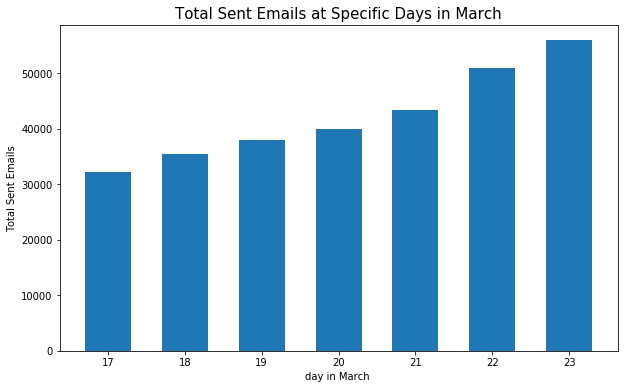

In [21]:
# Plotting 'sends' against 'send_day'
plt.figure(figsize=(10,6)) 
plt.title('Total Sent Emails at Specific Days in March',fontsize=15)
plt.bar(time1,df_time1['sends'],width=0.6)
plt.xlabel('day in March ')
plt.ylabel('Total Sent Emails')

- From the graph above, the sent emails increases throughout the time span of the campaign, instead of having either flat distribution (each day sent the same amount of email) or having a preferred time frame (day/number of days) to send emails. 


By having an understanding of the email recipients' behaviors in their email opening preference. We can slightly focus to send the emails at a desirable date and time to gain the most benefits in the campaign 

#### 4.2 Opened Emails against Time 
I group the opened emails based on the day that they are opened from March 17th to March 25th
- Create corresponding dataframe grouping by the day the emails are opened
- Plot the total opened email per day against time

In [22]:
#Data Frame 
df_time2 = df_original.groupby(['open_day']).sum()
time2=df_time2.index.tolist()
time2=time2[1:]

df_time2

,sends,opens,clicks,unsubs,send_year,send_month,send_day,send_hour,send_weekday,open_year,open_month,open_hour,open_weekday
open_day,,,,,,,,,,,,,
0.0,221264,0,0,0,445599514.0,663753.0,4514296.0,4.002242e+06,753029.0,0.0,0.0,0.000000,0.0
17.0,4156,4156,255,4,8370184.0,12468.0,70652.0,7.310798e+04,0.0,8370184.0,12468.0,84784.571667,0.0
18.0,6820,6820,430,9,13735480.0,20460.0,118237.0,1.224084e+05,2297.0,13735480.0,20460.0,91371.571111,6820.0
19.0,9072,9072,602,13,18271008.0,27216.0,165507.0,1.685064e+05,11283.0,18271008.0,27216.0,120295.514444,18144.0
20.0,11659,11659,839,17,23481226.0,34977.0,226508.0,2.050565e+05,28305.0,23481226.0,34977.0,171158.599722,34977.0
21.0,9858,9858,614,9,19854012.0,29574.0,202044.0,1.662816e+05,34458.0,19854012.0,29574.0,152009.424722,39432.0
22.0,12535,12535,843,23,25245490.0,37605.0,269336.0,2.127010e+05,56241.0,25245490.0,37605.0,195080.036389,62675.0
23.0,9944,9944,713,19,20027216.0,29832.0,220759.0,1.777698e+05,51711.0,20027216.0,29832.0,147821.482778,59664.0
24.0,9104,9104,707,20,18335456.0,27312.0,205263.0,1.722485e+05,50495.0,18335456.0,27312.0,84074.321111,0.0


Text(0, 0.5, 'Total Opened Emails')

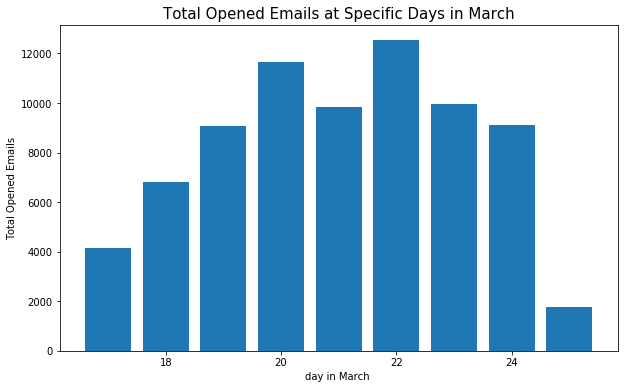

In [52]:
# Plotting 'opens' against 'open_day'
plt.figure(figsize=(10,6)) 
plt.title('Total Opened Emails at Specific Days in March',fontsize=15)
plt.bar(time2,df_time2.loc[df_time2['opens']!=0,'opens'].tolist())
plt.xlabel('day in March ')
plt.ylabel('Total Opened Emails')


For clarification, despite there are 9 days in the graph, all the open emails are sent within a week span of time (all the email are sent from Monday to Sunday). Some of the emails are opened after the week is over while the time the emails are sent is from Monday to Sunday of last week.

The two tallest columns falls on the 20th and 22nd of March; the corresponding day of the week is Thursday and Saturday. It means that the emails are most likely to be opened on **Thursday and Saturday**

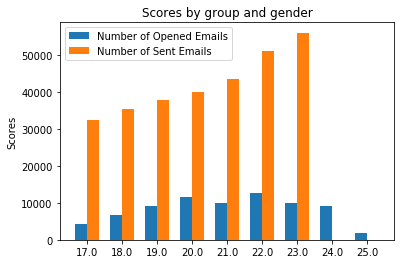

In [63]:
x = np.arange(len(time2))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, df_time2.loc[df_time2['opens']!=0,'opens'].tolist() , width, label='Number of Opened Emails')
rects2 = ax.bar(x + width/2,df_time1['sends'].append(pd.Series([0.0,0.0]),ignore_index=True), width, label='Number of Sent Emails')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(time2)
ax.legend()

### 4.3 On average, how long does it take for a recipient to open an email?
To calculate, I first see how many hours does it take for email recipients to open the sent email; then I convert that value into day units. The below is the equation: 
$$ \text{avg time}= \frac{(24\times\text{n}-\text{send_hour})+\text{open_hour}}{\text{total sent emails}}$$

  where: n is the different between the open_day and the send_day. 

In this case, we will assume that all the emails are sent to unique individuals/ recipients 

In [24]:
subset_opens=df_original[df_original['open_time']!='0']  #Subsetting of df_original: only consider opened emails
time_open= 24*(subset_opens['open_day']-subset_opens['send_day'])-subset_opens['send_hour']+subset_opens['open_hour'] #the time it takes for recipient to open an email 

print('Avg Time: ',time_open.mean(),' hours or ', time_open.mean()/24,' day')


Avg Time:  14.494692884303433  hours or  0.6039455368459764  day


- Conclusion: 

**On avergage, it takes about half a day for a recipient to read the email. To be specific, the average is  14.50 hours or 0.60 day**

#### 4.4. Comparing the variables against week day
1.1 Create dataframes groupby the day of the week
  - Applying Open rate, Click-through rate and Unsubscribe rate formulas to calculate variables in the table
      - 'open_rate' : Open rate
       
        $$\text{Open Rate}= \frac{\text{total email opens based on the time sent}}{\text{total emails send on the same time}}$$
   
    - 'click_rate': Click-through rate
      $$\text{Click-through Rate}= \frac{\text{total clicks based on the time sent}}{\text{total emails send on the same time}}$$
    - 'click_open_rate': Click-to-open rate
      $$\text{Click-to-open Rate}= \frac{\text{total clicks based on the time sent}}{\text{total emails open on the same time}}$$
    - 'unsub_rate': Unsubscribe rate
       $$\text{Unsubscribe Rate} = \frac{\text{total unsubs based on the time sent}}{\text{total emails send on the same time}}$$
 
I chose the denominator as the total emails sent in the same time frame instead of choosing the total emails that the campaign sent because I want to measure the efficiency of each day.

For example:
    
  On Monday, you send out 50 emails; 25 of them are opened. The open rate would be 50%
  On Friday, you send ot 100 of the same emails; 25 of them are also opened. The open rate would be 25%. 

In this manner, eventhough the same amount of emails are opened on both days, the engagement on Monday is higher.





** Note: 
    - The data range for send_time is from March 17th to March 23th,2014. Transforming those dates into day of the week, we have March 17th is Monday and March 23rd is Sunday  
    - The data range for open_time is from March 17th to March 25th. March 24th is a Monday, March 25th is a Tuesday. 
 

Questions hoping to answer: 
   - What days of the week will likely have the most open rate, click through rate and unsubscribe rate

For example: Emails that are sent on Monday are most likely to be opened

In [50]:
#dataframe groupby send_weekday - the day of the week when the emails are sent 
df_weekday = df_original.groupby(['send_weekday']).sum()
df_weekday.drop(columns=['open_weekday','send_month','send_year','send_day','send_hour','open_year','open_day','open_month','open_hour'],inplace=True)
df_weekday.columns = ['total_sends','total_opens','total_clicks','total_unsubs']

df_weekday['open_rate']= df_weekday['total_opens']/df_weekday['total_sends']*100
df_weekday['click_rate']= df_weekday['total_clicks']/df_weekday['total_sends']*100
df_weekday['click_open_rate']= df_weekday['total_clicks']/df_weekday['total_opens']*100
df_weekday['unsub_rate']= df_weekday['total_unsubs']/df_weekday['total_sends']*100

df_weekday.head(10)

,total_sends,total_opens,total_clicks,total_unsubs,open_rate,click_rate,click_open_rate,unsub_rate
send_weekday,,,,,,,,
0.0,32263,9947,644,12,30.830983,1.996095,6.474314,0.037194
1.0,35486,9238,626,12,26.032802,1.764076,6.776359,0.033816
2.0,37934,8458,580,16,22.296620,1.528971,6.857413,0.042179
3.0,40014,9850,686,6,24.616384,1.714400,6.964467,0.014995
4.0,43438,11804,773,16,27.174363,1.779548,6.548628,0.036834
5.0,51048,13322,867,23,26.097007,1.698402,6.508032,0.045056
6.0,56003,12303,963,30,21.968466,1.719551,7.827359,0.053569


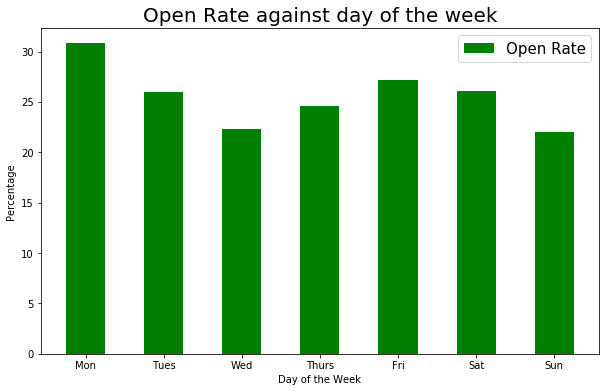

In [51]:
# Plot the Open Rate, the Click through Rate and the Unsubscribe Rate 
weekday=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
plt.figure(figsize=(10,6)) 
plt.title('Open Rate against day of the week',fontsize=20)
plt.bar(weekday,df_weekday['open_rate'],width=0.5, color='green', label="Open Rate")
plt.xticks(weekday)
plt.xlabel('Day of the Week')
plt.ylabel('Percentage ')
plt.legend(prop={"size":15})
plt.show()

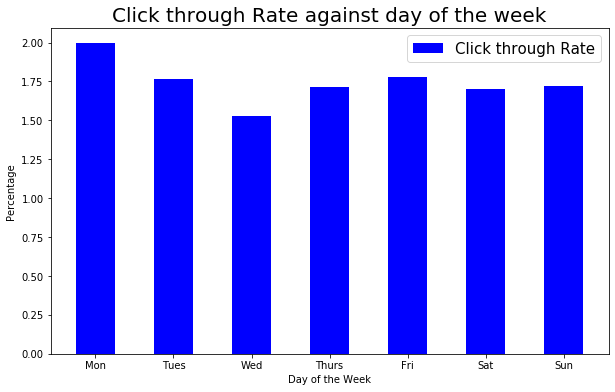

In [29]:

plt.figure(figsize=(10,6)) 
plt.title('Click through Rate against day of the week',fontsize=20)
plt.bar(weekday,df_weekday['click_rate'], width = 0.5,color= 'blue', label='Click through Rate')
plt.xticks(weekday)
plt.xlabel('Day of the Week')
plt.ylabel('Percentage ')
plt.legend(prop={"size":15})
plt.show()

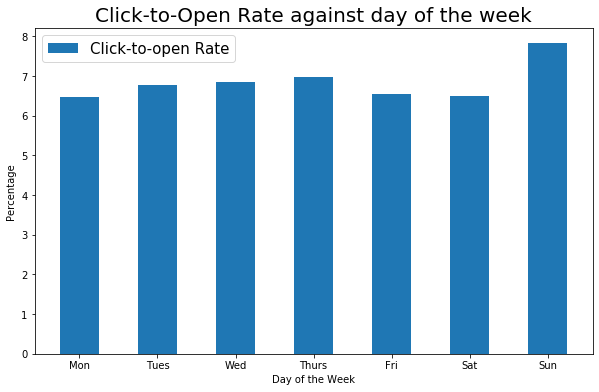

In [32]:
plt.figure(figsize=(10,6)) 
plt.title('Click-to-Open Rate against day of the week',fontsize=20)
plt.bar(weekday,df_weekday['click_open_rate'],width=0.5, label='Click-to-open Rate')
plt.xticks(weekday)
plt.xlabel('Day of the Week')
plt.ylabel('Percentage ')
plt.legend(prop={"size":15})
plt.show()

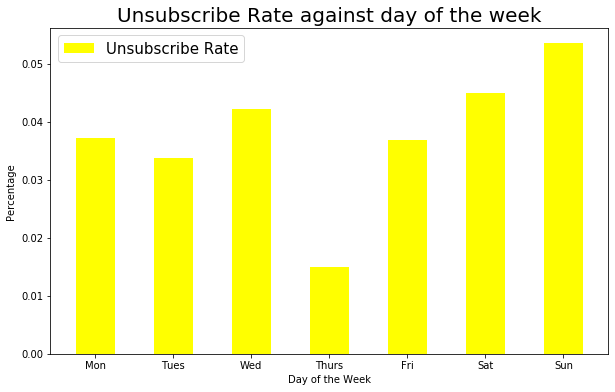

In [31]:
plt.figure(figsize=(10,6)) 
plt.title('Unsubscribe Rate against day of the week',fontsize=20)
plt.bar(weekday,df_weekday['unsub_rate'],width=0.5, color='yellow', label='Unsubscribe Rate')
plt.xticks(weekday)
plt.xlabel('Day of the Week')
plt.ylabel('Percentage ')
plt.legend(prop={"size":15})
plt.show()

From the 3 plots, I make the following conclusions: 
  - In the Open Rate graph:
    - The emails sent on Monday and Friday are most likely to be opened; highest open rate. 
    - The emails sent on Wednesday and Sunday are less likely to be opened
  - In the Click through Rate graph: 
    - People are most likely to click on the link in the email if them are sent on Monday. 
    - The click through rate through out the week stays pretty much close too each other (roughly around 1.7%)
  - In the Click-to-open Rate graph: 
    - The distribution of the rate is relatively flat. We can make a safe assumption that the rate doesn't change within the weekday (the scale is from 6% to 8%) 
  - In the Unsubscribe Rate graph: 
    - Emails sent on Thursday are unlikely for a recipient to unsubscribe 
    - People most likely to unsubscribe to emails that are sent on Wednesday, Saturday and Sunday. On Wednesday and Saturday, the unsubscribe rates for that weekday are 0.042% for Wednesday and 0.045% for Saturday
   

### 4.5 Create dataframe with chosen hour frame 
a) When is it most likely for a recipient to open the emails?
   - I first calculate the time it takes for a recipient to open his/her email - which is previously calculated in time_open. 
   - Graph the relationship between percentage of the opened email and the time opening an email 

In [34]:
time_open_percent = np.ceil(time_open)
time_open_percent= pd.DataFrame(time_open_percent,columns=['time'])
time_open_percent=time_open_percent.pivot_table(index=['time'], aggfunc='size')
time_open_percent= pd.DataFrame(time_open_percent,columns=['open_emails'])
time_open_percent['email_percent']=time_open_percent['open_emails']*100/total_opens
#print(time_open_percent['email_percent'].cumsum())
time_open_percent.sort_values(by=['email_percent'],ascending=False).head(30)

time
1.0       10.282694
2.0       18.232295
3.0       27.682123
4.0       34.515897
5.0       41.180161
            ...    
193.0     99.987988
194.0     99.990657
195.0     99.994661
196.0     99.997331
197.0    100.000000
Name: email_percent, Length: 191, dtype: float64


,open_emails,email_percent
time,,
1.0,7704,10.282694
3.0,7080,9.449828
2.0,5956,7.949601
4.0,5120,6.833774
5.0,4993,6.664264
7.0,3571,4.766290
6.0,3296,4.399242
8.0,3279,4.376552
9.0,2643,3.527669


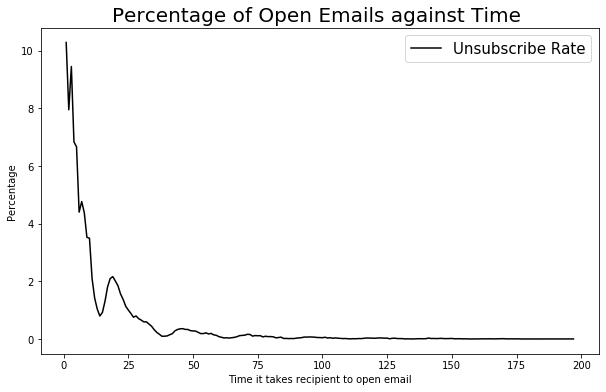

In [35]:
plt.figure(figsize=(10,6)) 
plt.title('Percentage of Open Emails against Time ',fontsize=20)
plt.plot(time_open_percent.index.tolist(),time_open_percent['email_percent'],color='black', label='Unsubscribe Rate')
plt.xlabel('Time it takes recipient to open email')
plt.ylabel('Percentage')
plt.legend(prop={"size":15})

plt.show()

- **27% of all emails** are opened the first **3 hours** after receiving.
- Only **1% of all emails** are opened after **13 hours** receiving. 

b) My hypothesis for send rate is that people don't usually check and most importantly, tend to erase their emails early in the morning, during lunch time or after work. So the ideal time to send emails may be from 8:30 to 10:30, 2:30pm-5:00 or 8:00pm - midnight. I will then now test my hypothesis by: 


    - Creating tables that are grouped by an hour frame of a specific length
       - Graphing those hour frames with the number of opened emails, the number of clicks and the number of unsubscribing
    
I would then choose the hour frame that has a length of 3 hours:
    - 1st hour frame: 00:00 am - 3:00 am
    - 2nd hour frame: 3:00 am - 6:00 am
    - 3rd hour frame: 6:00 am - 9:00 am 
    - 4th hour frame: 9:00 am - 12:00 pm 
    - 5th hour frame: 12:00 am - 15:00 pm 
    - 6th hour frame: 15:00 am - 18:00 pm 
    - 7th hour frame: 18:00 am - 21:00 pm 
    - 8th hour frame: 21:00 am - 11:59 pm 
    

What time frame do people usually open their emails, click on the given link, and unsubscribe to the email

In [36]:
#hour frame with  a length of 3 hours 
hf_1 = subset_opens[(subset_opens['open_hour']>0.0) & (subset_opens['open_hour']<=3.0)]
hf_2 = subset_opens[(subset_opens['open_hour']> 3.0) & (subset_opens['open_hour']<=6.0)]
hf_3 = subset_opens[(subset_opens['open_hour']>6.0) & (subset_opens['open_hour']<=9.0)]
hf_4 = subset_opens[(subset_opens['open_hour']>9.0) & (subset_opens['open_hour']<=12.0)] 
hf_5 = subset_opens[(subset_opens['open_hour']>12.0) & (subset_opens['open_hour']<=15.0)]
hf_6 = subset_opens[(subset_opens['open_hour']>15.0) & (subset_opens['open_hour']<=18.0)] 
hf_7 = subset_opens[(subset_opens['open_hour']>18.0) & (subset_opens['open_hour']<=21.0)] 
hf_8 = subset_opens[(subset_opens['open_hour']>21.0) & (subset_opens['open_hour']<24.0)] 

In [37]:
hf = pd.DataFrame([hf_1.sum()])
hf=hf.append(pd.DataFrame([hf_2.sum()]))
hf=hf.append(pd.DataFrame([hf_3.sum()]))
hf=hf.append(pd.DataFrame([hf_4.sum()]))
hf=hf.append(pd.DataFrame([hf_5.sum()]))
hf=hf.append(pd.DataFrame([hf_6.sum()]))
hf=hf.append(pd.DataFrame([hf_7.sum()]))
hf=hf.append(pd.DataFrame([hf_8.sum()]))

In [38]:
hf['hour_frame']=list(range(1,9))

hf.drop(columns=['open_weekday','send_weekday','send_month','send_year','send_day','send_hour','open_year','open_day','open_month','open_hour'],inplace=True)
hf.reset_index(drop=True, inplace=True)
hf.head(10)

,sends,opens,clicks,unsubs,hour_frame
0,11080.0,11080.0,798.0,20.0,1
1,6939.0,6939.0,519.0,10.0,2
2,2023.0,2023.0,120.0,0.0,3
3,4142.0,4142.0,326.0,11.0,4
4,6412.0,6412.0,537.0,12.0,5
5,11316.0,11316.0,775.0,15.0,6
6,18937.0,18937.0,1130.0,29.0,7
7,14072.0,14072.0,934.0,18.0,8


In the table above: 
    - 'sends'/'opens'/'clicks'/'unsubs': summing of sent emails/opened emails/ number of clicks/ number of unsubscribting during an indicated hour frame
 
After getting the data, I now then create several frequency plots relating to the opened email pattern, the number of clicks and number of unsubscriptions

No handles with labels found to put in legend.


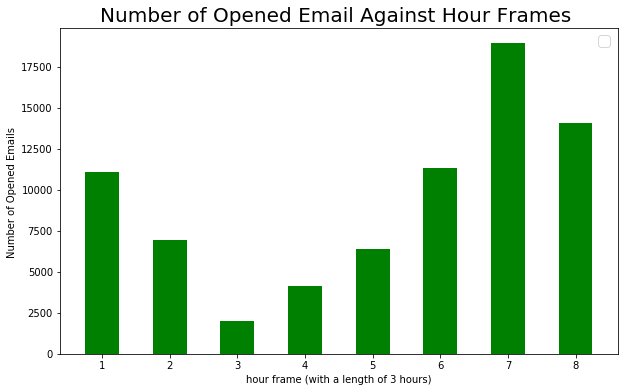

In [39]:
plt.figure(figsize=(10,6)) 
plt.title('Number of Opened Email Against Hour Frames ',fontsize=20)
plt.bar(hf['hour_frame'],hf['opens'],width=0.5, color='green')
plt.xlabel('hour frame (with a length of 3 hours)')
plt.ylabel('Number of Opened Emails ')
plt.legend(prop={"size":15})
plt.show()

No handles with labels found to put in legend.


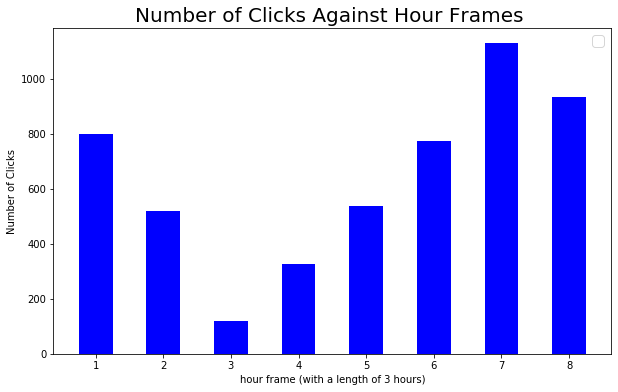

In [40]:
plt.figure(figsize=(10,6)) 
plt.title('Number of Clicks Against Hour Frames ',fontsize=20)
plt.bar(hf['hour_frame'],hf['clicks'],width=0.5, color='blue')
plt.xlabel('hour frame (with a length of 3 hours)')
plt.ylabel('Number of Clicks')
plt.legend(prop={"size":15})
plt.show()

No handles with labels found to put in legend.


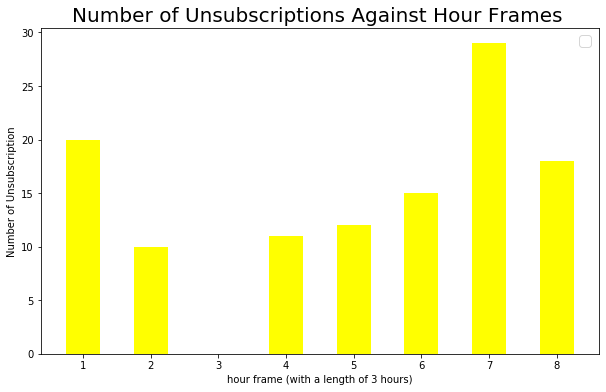

In [41]:
plt.figure(figsize=(10,6)) 
plt.title('Number of Unsubscriptions Against Hour Frames ',fontsize=20)
plt.bar(hf['hour_frame'],hf['unsubs'],width=0.5, color='yellow')
plt.xlabel('hour frame (with a length of 3 hours)')
plt.ylabel('Number of Unsubscription')
plt.legend(prop={"size":15})
plt.show()

These are the conclusion from the above 3 graphs: 
- **The recipients are mostly checking their emails during the hour frame 7, which is from 6:00pm 9:00pm**
- From the graph the number of clicks agaisnt hour frame, **the hour frame that has the second highest number of clicks is from 9:00 pm - 11:59pm**  
- **The recipients are not in their emails during 6:00 am to 9:00 am**. During this time frame, most likely that people are getting ready to work or commuting


### 5. What are the recommendations in terms of what time we should  send our emails? 
Here are the conclusions I have made throughout the analysis process that are helpful in determining when should one send emails: 
- Recipients are most likely to read the email on Thursday and Saturday 
- They are less likely to open emails on Wednesday and Sunday

- On average, it takes around 14.50 hours for recipients to open their emails 

- Highest open rates are from emails sent on Monday and Friday 
- Lowest open rates are from emails sent on Wednesday and Sunday
- Highest click-through rate is on Monday. The rate is closely similar for the remaining days of the week.
- The click-to-open rate is in the range of 6%-8% everyday. The distribution of the rate against time is relatively flat. This information has no value contribution in determining what is the best day to send emails
- Emails sent on Thursday are less likely to be unsubscribed
- Recipients more likely to unsubscribe emails on Wednesday, Saturday and Sunday
- 27% of all emails are opened within the first 3 hours after receiving (around 10% in the first hour of receiving). 
- Only 1% of all emails are opened after 13 hours receiving
- The hour frame that has the highest engagement is around 6pm - 12:00 am 

It is most beneficial to find a time that would increase the open rate at the same time as the click-through rate. 

The sent email rate throughout the campaign increases as time increases. This is not the most effective way to send emails because there are days and times that recipients tends to be more engaged in their email activities 
- The sent email should be given in the following priority: 
    1. Monday
    2. Thursday and Friday
    3. Tuesday 
    4. Saturday 
    5. Wednesday and Sunday


- Because the emails are more likely to be opened within the first hour and there is more email engagement after 6:00 pm, the optimal time to send the email is around 6:00 pm. 
    - In the 6:00pm - 9:00 pm hour frame, there is more email engagement because emails are most likely not to be unsubcribed, highest number of clicks, and number of opened emails


### 6. Do you have any recommendation for further analysis? 
- The open rate of around 25% is pretty impressive for an email marketing campaign. The low in both click-through-rate and click-to-open rate are more worrisome. 
    - What I am seeing here is, the customers are interested in the content of the emails because of the headlines. But lose interest after seeing the content/design of the emails. Depending on the purpose of the marketing campaign, the contents/designs have to both meet the expectations of the headline and trigger user's curiousity
    - The suggestion for this is to conduct an A/B testing or UX research - understanding who our clients are and what can the campaign benefit them. 

- Other variables that I think would help trememdously in determining when to send the emails are recipients' age, gender, deliverability of the emails, conversion factor (what is the desired action that the campaign wants the recipients to do)
- Of course, the more data sets the better. We have more information to be more certain that our conclusions are reliable.

## 4. Reference
[1] Blog Hubspot,"Email Analytics: The 8 Email Marketing Metrics & KPIs You Should Be Tracking" https://blog.hubspot.com/marketing/metrics-email-marketers-should-be-tracking

[2] IMPACT,"CTR vs. CTOR: Which Email Metric Should You Track?" https://www.impactbnd.com/blog/ctr-vs-ctor-which-email-marketing-metric-should-you-be-measuring

[3] Campaign Monitor, "What is a Good Unsunscribe Rate?" https://www.campaignmonitor.com/resources/knowledge-base/what-is-a-good-unsubscribe-rate/](https://www.campaignmonitor.com/resources/knowledge-base/what-is-a-good-unsubscribe-rate/)

[4] Campaign Monitor, "Guides: Ultimate Email Marketing Benchmarks for 2020: By Industry and Day"
https://www.campaignmonitor.com/resources/guides/email-marketing-benchmarks/